This Notebook will demonstrate the importance of creating separate datasets to train and test your Machine Learning models. We will then look at how to create these training and testing datasets.





The following commands connect to GDrive. Running the commands should present an accounts.google.com link. Click to open it in a browser window (where you may be prompted to login in to your Google account and authorise Colabs to access your files) and copy the authorisation code it gives you (there's a little 'double rectangle' which you can click to copy). Then paste the code in the space below, where it says "Enter your authorization code":

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import the libraries used by this tutorial. Libraries contain programmes that people have already written to save you re-inventing the wheel. The comments next to them describe their purpose.

In [ ]:
import pandas as pd # A library for loading and manipulating tabular data
import os           # Library for accessing operating system files
import seaborn as sns  # A graph visualisation library
from matplotlib import pyplot as plt  # Also a graphing library, seaborn uses it under the hood
import sklearn      # The most common Python Machine Learning library - scikit learn
from sklearn.model_selection import train_test_split  # Used to create training and test data

Now check that you can access the data files for this tutorial. After running this cell you should see two files in a list:
 ['zoo.csv','zoo.clean.csv']

In [ ]:
data_dir = '/content/gdrive/My Drive/MLC/Session 2/Data/'
os.listdir(data_dir)

['us_census_1994.txt', 'zoo.csv', 'zoo.gsheet', 'zoo']

We will start by loading the zoo data from last time.

In [ ]:
zoo_data = pd.read_csv(data_dir + 'zoo.csv', header=None)
zoo_data.columns = ['animalname','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', \
                    'breathes','venomous','fins','legs','tail','domestic','catsize','animalclass']
zoo_data = zoo_data.sort_values(by='animalclass')
zoo_data.head()

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animalclass
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
31,gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
34,hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
35,hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
43,leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Let's remind ourselves of the distribution of classes of animals in the data. This is our target variable, the one we would like to predict when we Machine Learn.

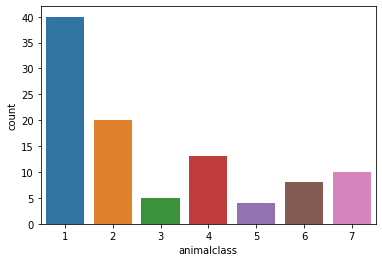

In [ ]:
sns.countplot(zoo_data['animalclass'])

Our next step is to split this dataset into two parts. The easiest way to do this is to use the first N rows as a training set and keep the remainder for testing. Let's see how these two datasets look. **Does everything look ok?**


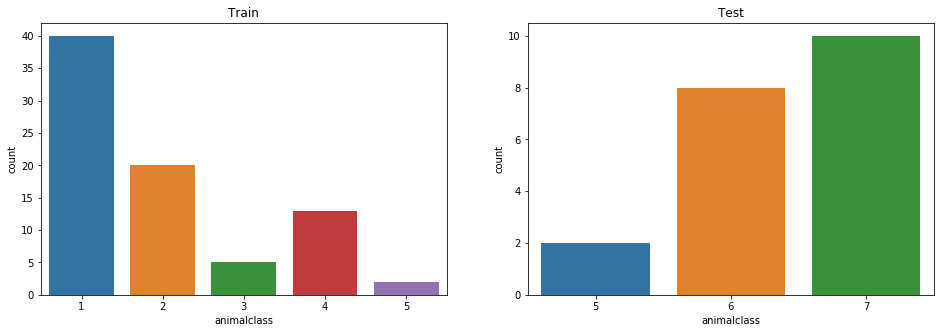

In [ ]:
zoo_train = zoo_data.head(80)
zoo_test = zoo_data.tail(20)
fig, ax =plt.subplots(1,2, figsize=(16, 5))
sns.countplot(zoo_train['animalclass'], ax=ax[0])
sns.countplot(zoo_test['animalclass'], ax=ax[1])
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

If you answered yes to the last question, think again.

**Do you have enough test data to be sure that your ML algorithm has learned how to recognise class 1 correctly?**

**Do you have enough training data to teach your algorithm to recognise class 7?**

What went wrong? If you scroll back up to where we loaded the data, I slipped in a 'sort' command. This meant that the data was sorted by animalclass, and so taking the top 80 rows missed out the 6s and 7s completely from the training set, while not including any of 1-4s. The latter situation means we can't test properly, which the former means we can't train on 2 of the classes - it doesn't even know they exist.


A much better approach is to randomise the process, and fortunately we have a one line of code (because data scientists do this all the time!) to do this for us. This time the graphs look much more even.

However, this code at the moment will split the data 50:50 between train and test. This means we're only using 50 rows to train our model which might not be enough. So we would like to use as much as we can, which still being able to test properly.

**Try changing the train_size parameter to a bigger value (no more than 1.0 though)**

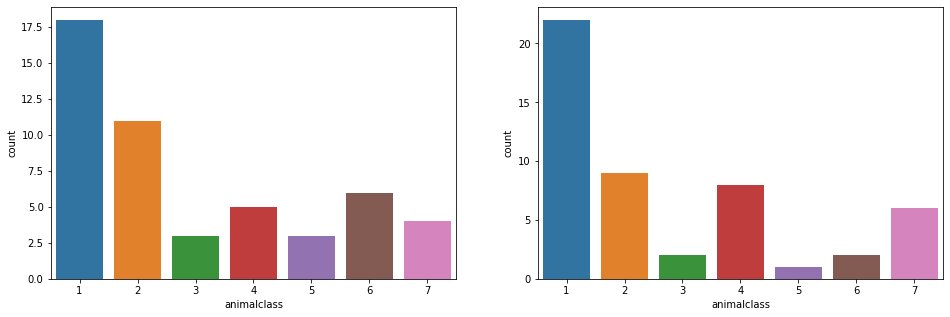

In [ ]:
zoo_train, zoo_test = train_test_split(zoo_data, train_size = 0.5)
fig, ax =plt.subplots(1,2, figsize=(16, 5))
sns.countplot(zoo_train['animalclass'], ax=ax[0])
sns.countplot(zoo_test['animalclass'], ax=ax[1])
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

You should have seen that for higher percentages of training data there isn't enough in some of the classes to have both training and test examples. You may also find that your graphs have different distributions due to the randomised element of the splitting process.

Another option is to 'stratify' your data. This involves keeping the distribution between train and test as close as possible. Obviously there are limits to this but it won't let you lose classes altogether. Again data scientists have made this easy by including the 'stratify' parameter in the function.

**Experiment with the train_size parameter again**

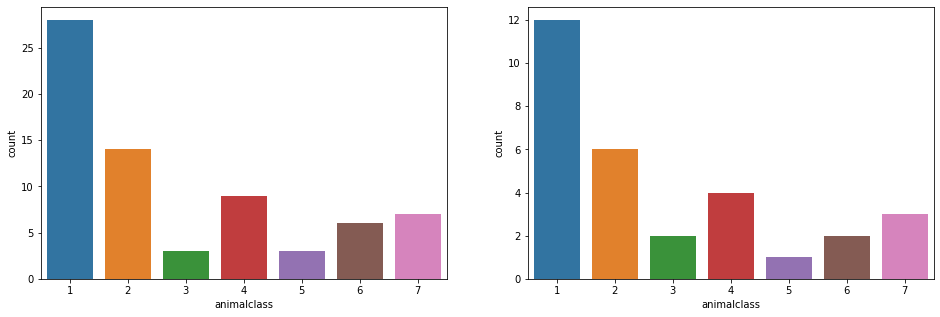

In [ ]:
zoo_train, zoo_test = train_test_split(zoo_data, train_size = 0.7, stratify = zoo_data.animalclass)
fig, ax =plt.subplots(1,2, figsize=(16, 5))
sns.countplot(zoo_train['animalclass'], ax=ax[0])
sns.countplot(zoo_test['animalclass'], ax=ax[1])
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

That was a very brief introduction to creating training and testing datasets. There are more advanced techniques too but this will get us started. Here is a summary of what we learned:

1.   Looked at underfitting and overfitting as motivations
2.   Showed why we should randomise our data

1.   Showed the effect of changing the train/test split ratio
2.   Introduced stratification














